 Ознакомиться с решением задачи с помощью первого интерполяционного полинома Ньютона.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import factorial

In [9]:
x_0 = 1
h = 0.5
count = 10


def f(x):
    return -0.01 * x**3 + 0.02 * x**2 + 0.1 * x + 1.5


In [10]:
X = x_0 + np.arange(count) * h
Y = f(X)

pd.DataFrame(zip(X, Y), columns=["x", "y"])

,x,y
0,1.0,1.61000
1,1.5,1.66125
2,2.0,1.70000
3,2.5,1.71875
4,3.0,1.71000
5,3.5,1.66625
6,4.0,1.58000
7,4.5,1.44375
8,5.0,1.25000
9,5.5,0.99125


In [11]:
vectors = []
y = Y.copy()
while len(y) > 1:
    y = y[1:] - y[:-1]
    vectors.append(y)

for i, v in enumerate(vectors):
    print(f"d{i+1}:", end=' ')
    print(*map(lambda x: round(x, 3), v), sep=', ')


d1: 0.051, 0.039, 0.019, -0.009, -0.044, -0.086, -0.136, -0.194, -0.259
d2: -0.012, -0.02, -0.028, -0.035, -0.042, -0.05, -0.058, -0.065
d3: -0.008, -0.008, -0.007, -0.008, -0.008, -0.008, -0.007
d4: 0.0, 0.0, -0.0, 0.0, 0.0, 0.0
d5: 0.0, -0.0, 0.0, 0.0, 0.0
d6: -0.0, 0.0, -0.0, 0.0
d7: 0.0, -0.0, 0.0
d8: -0.0, 0.0
d9: 0.0


In [12]:
def get_function(x0, h, vectors):
    def delta(k, i=0):
        return vectors[k][i]

    a = [delta(k) / factorial(k + 1) for k in range(len(vectors))]
    a.insert(0, Y[0])

    def func(x):
        t = (x - x0) / h
        elements = [_a * np.prod([t - i for i in range(i)]) for i, _a in enumerate(a)]
        return round(sum(elements), 5)

    def iter_wrap(x):
        if isinstance(x, np.ndarray) or isinstance(x, list):
            return np.array(list(map(func, x)))
        return func(x)

    return iter_wrap


func = get_function(x_0, h, vectors)

y_ = func(X)
y_

array([1.61   , 1.66125, 1.7    , 1.71875, 1.71   , 1.66625, 1.58   ,
       1.44375, 1.25   , 0.99125])

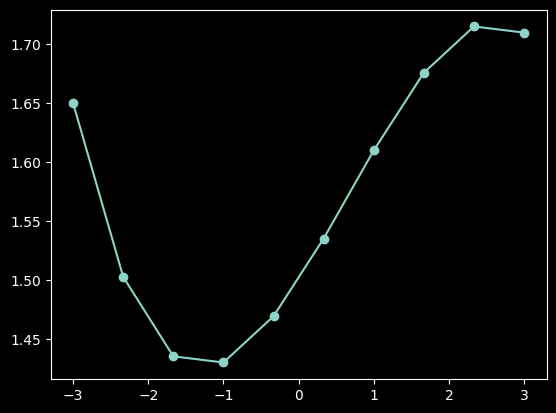

In [13]:
x = np.linspace(-3, 3, 10)

# Точки - изначальные значения
plt.scatter(x, f(x))
# Линия - Вычисленные через функцию интерполяции
plt.plot(x, func(x))
